In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import re
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("/Users/ayaskantsamal/Documents/EXCELR/assignments/Airlines+Data.xlsx",sheet_name='Sheet1')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df=df.set_index('Month')
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [4]:

#df.index.freq = 'MS' 

In [5]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [6]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [7]:
df.shape

(96, 1)

## Time Series Analysis

<AxesSubplot:ylabel='Count'>

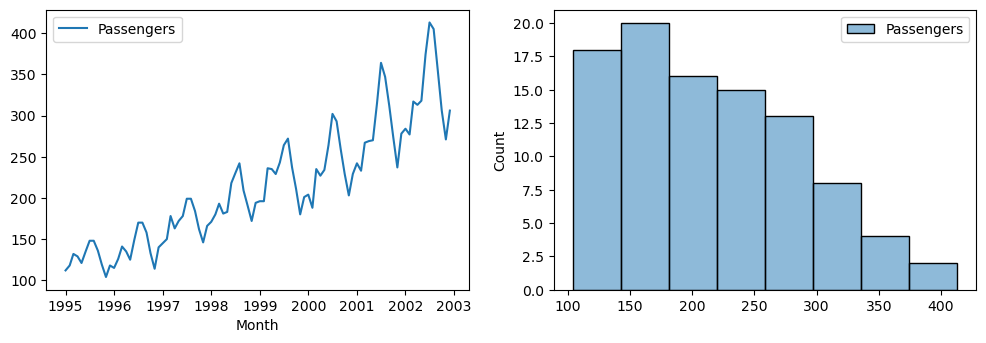

In [8]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.lineplot(df)
plt.subplot(2,2,2)
sns.histplot(df)

## Time Series Decomposition

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Seasonal decompose

<Figure size 1200x800 with 0 Axes>

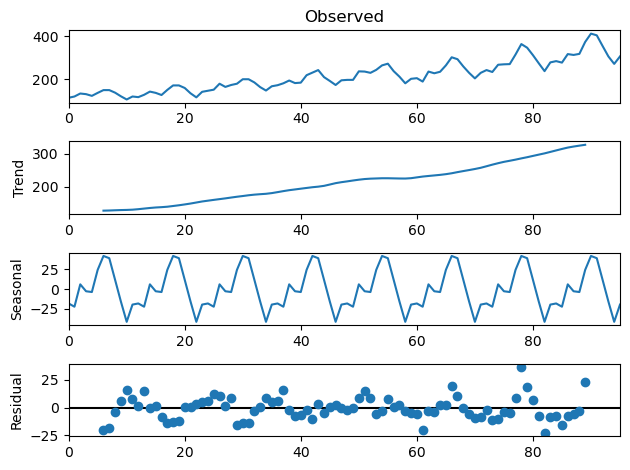

In [10]:
#graphs for quarterly data with additive decompose 

plt.figure(figsize=(12,8))
ts_decomp= seasonal_decompose((df.values),model='additive',period = 12)

ts_plot = ts_decomp.plot()

### Multiplicative Seasonal Decompose

<Figure size 1200x800 with 0 Axes>

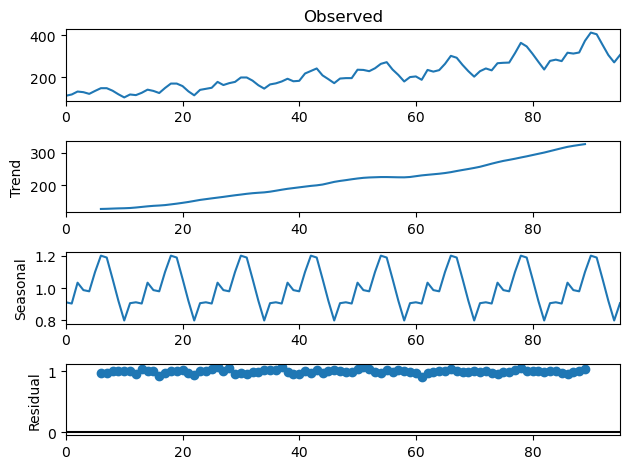

In [11]:
# Multiplicative seasonal decompose
plt.figure(figsize=(12,8))
ts_decomp_mul= seasonal_decompose((df.values),model='multiplicative',period = 12)

ts_plot_mul = ts_decomp_mul.plot()

## Forecasting models building

In [12]:
df_train=df[0:72]
df_test=df[72:]

In [13]:
df_train.shape,df_test.shape


((72, 1), (24, 1))

In [14]:
df_train.tail(10)

,Passengers
Month,
2000-03-01,235
2000-04-01,227
2000-05-01,234
2000-06-01,264
2000-07-01,302
2000-08-01,293
2000-09-01,259
2000-10-01,229
2000-11-01,203


In [15]:
df_test.head(10)

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312


 # Forecasting

## 1.  Simple Moving Average 

In [16]:
df_ma=df.copy()

In [17]:
train_len=72

In [18]:
df_ma['ma_forecast'] = df_ma['Passengers'].rolling(12).mean()

In [19]:
df_ma['ma_forecast'][train_len:] = df_ma['ma_forecast'][train_len-1]

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
## Calculating RMSE and MAPE
rmse_ma = mean_squared_error(df_test['Passengers'],df_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

82.89

## 2.  Simple Exponential Smoothing

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [23]:
ses_model = SimpleExpSmoothing(df_train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = df_test.index[0],end = df_test.index[-1])

In [24]:
rmse_ses = mean_squared_error(df_test['Passengers'],pred_ses,squared=False).round(2)
rmse_ses

83.65

## 3. Holt's Method

In [25]:
from statsmodels.tsa.holtwinters import Holt

In [26]:
holt_model = Holt(df_train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = df_test.index[0],end = df_test.index[-1])

In [27]:
rmse_holt = mean_squared_error(df_test['Passengers'],pred_holt,squared=False).round(2)
rmse_holt

148.19

## 4. Holt's Exponential Smoothing

### a. Additive method

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [29]:
hes_add_add = ExponentialSmoothing(df_train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = df_test.index[0],end = df_test.index[-1])

In [30]:
rmse_hes_add_add = mean_squared_error(df_test['Passengers'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

47.57

### b. Multiplicative method

In [31]:
hes_mul_add = ExponentialSmoothing(df_train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = df_test.index[0],end = df_test.index[-1])

In [32]:
rmse_hes_mul_add = mean_squared_error(df_test['Passengers'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

34.99

## 5. ARIMA model

### ACF plot

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

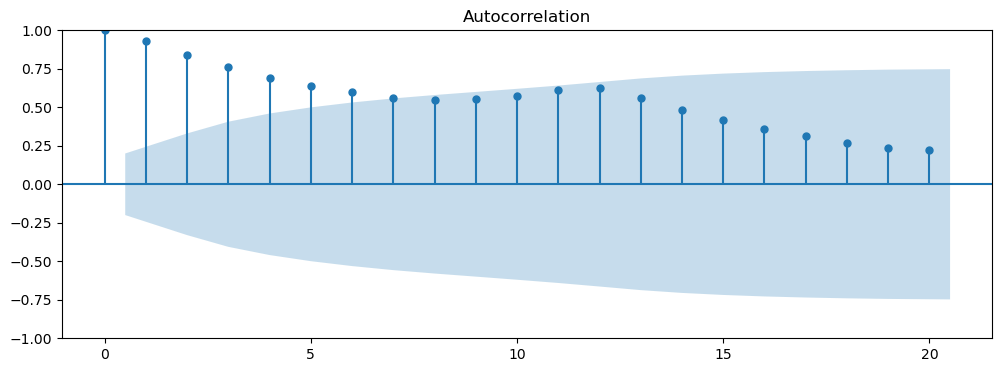

In [34]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(12,4))
acf_plot = plot_acf( df['Passengers'],ax=plt.gca(),lags=20)
plt.show()

The above plot shows that auto correlation is significant for lag=1

### PCF plot

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf

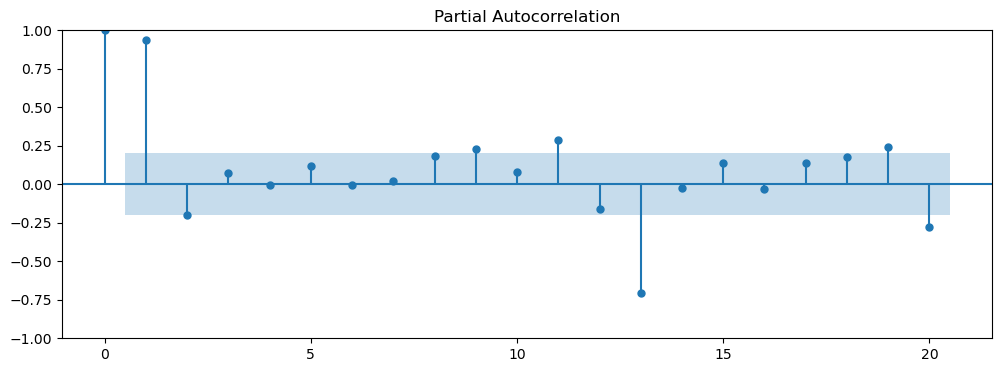

In [36]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( df['Passengers'],ax=plt.gca(),lags=20)
plt.show()

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
arima = ARIMA(df_train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = df_test.index[0],end = df_test.index[-1])

In [39]:
rmse_arima = mean_squared_error(df_test['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

88.96

## Choosing the best model

In [40]:
Final=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
model={'Models':Final,'Rmse':rmse}
df_model=pd.DataFrame(model)
df_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,34.99
3,Holt_additive,47.57
0,simple_moving_average,82.89
1,simple_expo_smoothing,83.65
5,ARIMA,88.96
2,Holt,148.19


Holt's exponential smoothing with multiplicative seasonality is the best model as it has the lowest rmse.